Intuition
to plot the diameter of the network after an attack of 0.01, 0.02,0.03-0.1 of the nodes at random of all the networks

In [1]:
import networkx as nx
from itertools import combinations
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
from random import sample
import random, math
import LP 
import os
import scipy.io

name = ['dolphins',
 'polbooks',
 'word_adjacencies',
 'arenas-email',
 'Karate',
 'Erdos Renyi',
 'circuits s208_st',
 'circuits s420_st',
 'circuits s838_st',
 'E. Coli',
 'Barabasi_albert_graph',
 'facebook0',
 'facebook107',
 'facebook348',
 'facebook414',
 'facebook686',
 'facebook1684',
 'bn-macaque-rhesus_brain_2',
 'soc-tribes',
 'fb-pages-food',
 'bn-cat-mixed-species_brain_1',
 'soc-firm-hi-tech']

datasets = ["\dolphins\dolphins.gml",
            "\polbooks\out2.txt",
            "\word_adjacencies.gml\word_adjacencies.gml",
            "\\arenas-email\\out2.txt",
            "Karate",
            "Erdos Renyi",
#             "\\USAir97\\USAir97.mtx", 
            "\\circuits\s208_st.txt",
            "\\circuits\s420_st.txt",
            "\\circuits\s838_st.txt",
            "\\E. Coli\E. Coli.txt",
            "Barabasi_albert_graph",
            "\\facebook\\0.edges",
            "\\facebook\\107.edges",
            "\\facebook\\348.edges",
            "\\facebook\\414.edges",
            "\\facebook\\686.edges",
            "\\facebook\\1684.edges",
#             "\\bio-celegans\\bio-celegans.mtx",
            "\\bn-macaque-rhesus_brain_2\\bn-macaque-rhesus_brain_2.txt",
            '\\soc-tribes\\soc-tribes.txt',
            '\\fb-pages-food\\fb-pages-food.txt',
            '\\bn-cat-mixed-species_brain_1\\bn-cat-mixed-species_brain_1.txt',
#             '\\ca-sandi_auths\\ca-sandi_auths.mtx',
            '\\soc-firm-hi-tech\\soc-firm-hi-tech.txt']

def read_graph2(g):
    file_name = 'standard networks dataset' + datasets[int(g)]
    print(file_name)
    G = nx.Graph()
    if g==4:
        G = nx.karate_club_graph()
    elif g==5:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif g==11:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    if G:
        print(len(G.nodes()), len(G.edges()))
    return G

directory = "Networks/"
networks = []
for filename in os.listdir(directory):
    with open(os.path.join(directory, filename)) as file:
        networks.append(filename)

# read the networks
Datasets = {}
for net in range(len(datasets)):
    Datasets[name[net]] = read_graph2(net)



standard networks dataset\dolphins\dolphins.gml
62 159
standard networks dataset\polbooks\out2.txt
190 441
standard networks dataset\word_adjacencies.gml\word_adjacencies.gml
112 425
standard networks dataset\arenas-email\out2.txt
1893 5451
standard networks datasetKarate
34 78
standard networks datasetErdos Renyi
500 1500
standard networks dataset\circuits\s208_st.txt
122 189
standard networks dataset\circuits\s420_st.txt
252 399
standard networks dataset\circuits\s838_st.txt
512 819
standard networks dataset\E. Coli\E. Coli.txt
1699 3758
standard networks datasetBarabasi_albert_graph
standard networks dataset\facebook\0.edges
500 1491
standard networks dataset\facebook\107.edges
1034 26749
standard networks dataset\facebook\348.edges
224 3192
standard networks dataset\facebook\414.edges
150 1693
standard networks dataset\facebook\686.edges
168 1656
standard networks dataset\facebook\1684.edges
786 14024
standard networks dataset\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt

In [33]:
T = [i/1000 for i in range(0,210,5)]
results = {'sim': T}
# results = pd.read_csv('Data/VandS result2.csv').to_dict('list')


In [35]:
for n in Datasets:
    G0 = Datasets[n]
    print(n, '\t\t', len(G0.nodes()), len(G0.edges()))
    if len(G0.nodes())<2500 and n not in results:
        result = []
        if G0:
            Nodes = G0.nodes()
            for t in T:
                K = round(len(Nodes)*t)
                sim = []
                for _ in range(25):
                    G = G0.copy()
                    attacked = random.sample(list(Nodes), k=K)
                    #print(f'Nodes = {len(Nodes)}\tK = {K}\tattacked = {len(attacked)}\t t = {t}')
                    edges_to_remove = []
                    for u, v in G.edges():
                        if u in attacked or v in attacked:
                            edges_to_remove.append((u, v))

                    G.remove_edges_from(edges_to_remove)                
                    if G:
                        try:
                            
#                         largest_component = G.subgraph(max(nx.connected_components(G), key=len))
                            sim.append(nx.algorithms.distance_measures.diameter(G))
                        except:
                            sim.append(0)
                result.append(np.mean(sim))
            print('\t\t', result[:5])
            results[n] = result
pd.DataFrame(results).to_csv('Data/VandS result2.csv')
print('Simulation done...')

dolphins 		 62 159
polbooks 		 190 441
word_adjacencies 		 112 425
arenas-email 		 1893 5451
		 [0.0, 0.0, 0.0, 0.0, 0.0]
Karate 		 34 78
		 [5.0, 5.0, 5.0, 0.0, 0.0]
Erdos Renyi 		 500 1500
		 [0.0, 0.0, 0.0, 0.0, 0.0]
circuits s208_st 		 122 189
		 [11.0, 0.0, 0.0, 0.0, 0.0]
circuits s420_st 		 252 399
		 [13.0, 0.0, 0.0, 0.0, 0.0]
circuits s838_st 		 512 819
		 [15.0, 0.0, 0.0, 0.0, 0.0]
E. Coli 		 1699 3758
		 [0.0, 0.0, 0.0, 0.0, 0.0]
Barabasi_albert_graph 		 0 0
facebook0 		 500 1491
		 [5.0, 0.0, 0.0, 0.0, 0.0]
facebook107 		 1034 26749
		 [9.0, 0.0, 0.0, 0.0, 0.0]
facebook348 		 224 3192
		 [9.0, 0.0, 0.0, 0.0, 0.0]
facebook414 		 150 1693
		 [0.0, 0.0, 0.0, 0.0, 0.0]
facebook686 		 168 1656
		 [6.0, 0.0, 0.0, 0.0, 0.0]
facebook1684 		 786 14024
		 [0.0, 0.0, 0.0, 0.0, 0.0]
bn-macaque-rhesus_brain_2 		 102 628
		 [4.0, 0.0, 0.0, 0.0, 0.0]
soc-tribes 		 16 58
		 [3.0, 3.0, 3.0, 3.0, 3.0]
fb-pages-food 		 458 457
		 [2.0, 0.0, 0.0, 0.0, 0.0]
bn-cat-mixed-species_brain_1 		 130 11

In [47]:
T = [i/1000 for i in range(0,60,5)]
T[:5]


[0.0, 0.005, 0.01, 0.015, 0.02]

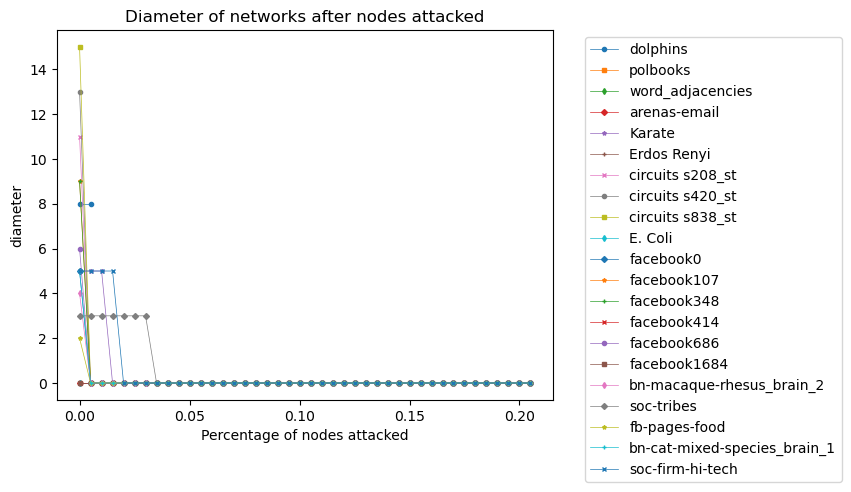

In [49]:
import matplotlib.pyplot as plt
results = pd.read_csv('Data/VandS result2.csv').to_dict('list')

fig, ax = plt.subplots()
markers = ['+', 'x', 'o', 's', 'd', 'D', '*'] # Add your desired markers here

for k, v in results.items():
    if k not in ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'sim']:
        x = [i/1000 for i in range(0,210,5)]
        y = v
        marker_idx = list(results.keys()).index(k) % len(markers) # Choose marker based on index of the result
        ax.plot(x, y, marker=markers[marker_idx], linewidth=0.5, markersize=3, label = k)

ax.set_xlabel('Percentage of nodes attacked')
ax.set_ylabel('diameter')
ax.set_title('Diameter of networks after nodes attacked')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


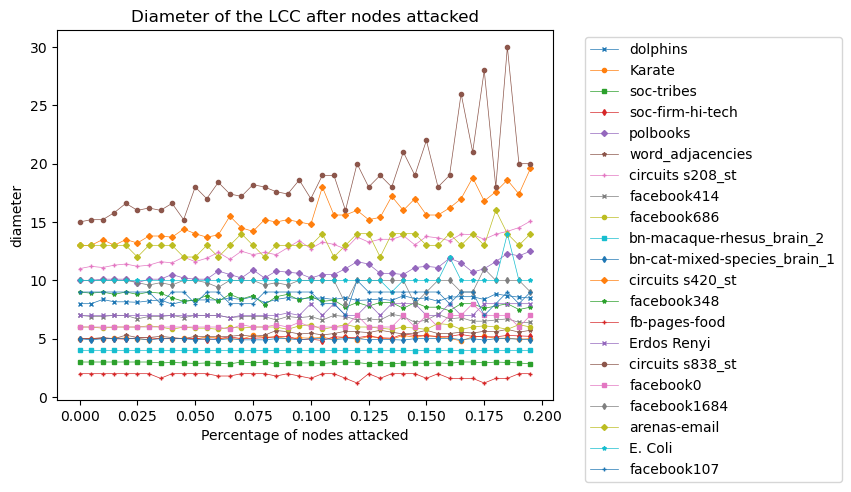

In [37]:
import matplotlib.pyplot as plt
results = pd.read_csv('Data/VandS result.csv').to_dict('list')

fig, ax = plt.subplots()
markers = ['+', 'x', 'o', 's', 'd', 'D', '*'] # Add your desired markers here

for k, v in results.items():
    if k not in ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'sim']:
        x = results['sim']
        y = v
        marker_idx = list(results.keys()).index(k) % len(markers) # Choose marker based on index of the result
        ax.plot(x, y, marker=markers[marker_idx], linewidth=0.5, markersize=3, label = k)

ax.set_xlabel('Percentage of nodes attacked')
ax.set_ylabel('diameter')
ax.set_title('Diameter of the LCC after nodes attacked')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [31]:
results


{'sim': [0.0,
  0.005,
  0.01,
  0.015,
  0.02,
  0.025,
  0.03,
  0.035,
  0.04,
  0.045,
  0.05,
  0.055,
  0.06,
  0.065,
  0.07,
  0.075,
  0.08,
  0.085,
  0.09,
  0.095,
  0.1,
  0.105,
  0.11,
  0.115,
  0.12,
  0.125,
  0.13,
  0.135,
  0.14,
  0.145,
  0.15,
  0.155,
  0.16,
  0.165,
  0.17,
  0.175,
  0.18,
  0.185,
  0.19,
  0.195,
  0.2,
  0.205],
 'dolphins': [8.0,
  8.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Karate': [5.0,
  5.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'soc-tribes': [3.0,
  3.0